In [175]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.mixture import GaussianMixture
from sklearn.svm import OneClassSVM

In [176]:
data = pd.read_csv('Data.csv/Road.csv')

In [177]:
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [178]:
data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [179]:
toRemove = ['Vehicle_driver_relation','Road_allignment','Pedestrian_movement','Cause_of_accident','Accident_severity','Owner_of_vehicle','Educational_level','Service_year_of_vehicle','Defect_of_vehicle','Number_of_vehicles_involved','Type_of_collision','Number_of_casualties','Casualty_class','Sex_of_casualty','Age_band_of_casualty','Casualty_severity','Work_of_casuality','Fitness_of_casuality']
data_clean = data.drop(columns=toRemove)

In [180]:
data_clean.shape

(12316, 14)

In [181]:
data_clean.isnull().sum()

Time                         0
Day_of_week                  0
Age_band_of_driver           0
Sex_of_driver                0
Driving_experience         829
Type_of_vehicle            950
Area_accident_occured      239
Lanes_or_Medians           385
Types_of_Junction          887
Road_surface_type          172
Road_surface_conditions      0
Light_conditions             0
Weather_conditions           0
Vehicle_movement           308
dtype: int64

In [182]:
data_clean = data_clean.dropna(subset=[
    'Type_of_vehicle', 
    'Driving_experience',  
    'Area_accident_occured', 
    'Lanes_or_Medians', 
    'Types_of_Junction', 
    'Road_surface_type', 
    'Vehicle_movement'
])

In [183]:
data_clean.isnull().sum()

Time                       0
Day_of_week                0
Age_band_of_driver         0
Sex_of_driver              0
Driving_experience         0
Type_of_vehicle            0
Area_accident_occured      0
Lanes_or_Medians           0
Types_of_Junction          0
Road_surface_type          0
Road_surface_conditions    0
Light_conditions           0
Weather_conditions         0
Vehicle_movement           0
dtype: int64

In [184]:
data_clean.dtypes

Time                       object
Day_of_week                object
Age_band_of_driver         object
Sex_of_driver              object
Driving_experience         object
Type_of_vehicle            object
Area_accident_occured      object
Lanes_or_Medians           object
Types_of_Junction          object
Road_surface_type          object
Road_surface_conditions    object
Light_conditions           object
Weather_conditions         object
Vehicle_movement           object
dtype: object

In [185]:
data_clean['Time'] = pd.to_datetime(data_clean['Time']).dt.hour

C:\Users\MANN\AppData\Local\Temp\ipykernel_3796\2073805055.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_clean['Time'] = pd.to_datetime(data_clean['Time']).dt.hour


In [186]:
data_clean

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Vehicle_movement
1,17,Monday,31-50,Male,Above 10yr,Public (> 45 seats),Office areas,Undivided Two way,No junction,Asphalt roads,Dry,Daylight,Normal,Going straight
2,17,Monday,18-30,Male,1-2yr,Lorry (41?100Q),Recreational areas,other,No junction,Asphalt roads,Dry,Daylight,Normal,Going straight
3,1,Sunday,18-30,Male,5-10yr,Public (> 45 seats),Office areas,other,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Going straight
7,17,Friday,18-30,Male,2-5yr,Automobile,Residential areas,other,Y Shape,Asphalt roads,Dry,Daylight,Normal,U-Turn
8,17,Friday,18-30,Male,Above 10yr,Lorry (41?100Q),Industrial areas,other,Y Shape,Earth roads,Dry,Daylight,Normal,Going straight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16,Wednesday,31-50,Male,2-5yr,Lorry (11?40Q),Outside rural areas,Undivided Two way,No junction,Asphalt roads,Dry,Daylight,Normal,Going straight
12312,18,Sunday,Unknown,Male,5-10yr,Automobile,Outside rural areas,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Dry,Daylight,Normal,Other
12313,13,Sunday,Over 51,Male,5-10yr,Bajaj,Outside rural areas,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Dry,Daylight,Normal,Other
12314,13,Sunday,18-30,Female,Above 10yr,Lorry (41?100Q),Office areas,Undivided Two way,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Other


In [187]:
for column in data_clean.columns:
    print(f"Unique values in column '{column}': {data_clean[column].unique()} \n\n")

Unique values in column 'Time': [17  1 14 22  8 15 12 18 13 20 16 21  9 10 19 11 23  7  0  5  6  4  3  2] 


Unique values in column 'Day_of_week': ['Monday' 'Sunday' 'Friday' 'Saturday' 'Thursday' 'Tuesday' 'Wednesday'] 


Unique values in column 'Age_band_of_driver': ['31-50' '18-30' 'Under 18' 'Over 51' 'Unknown'] 


Unique values in column 'Sex_of_driver': ['Male' 'Female' 'Unknown'] 


Unique values in column 'Driving_experience': ['Above 10yr' '1-2yr' '5-10yr' '2-5yr' 'No Licence' 'Below 1yr' 'unknown'] 


Unique values in column 'Type_of_vehicle': ['Public (> 45 seats)' 'Lorry (41?100Q)' 'Automobile'
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle'] 


Unique values in column 'Area_accident_occured': ['Office areas' '  Recreational areas' 'Residential areas'
 ' Industrial areas' 'Other' ' Church areas' '  Market areas'
 'Rural villag

In [188]:
label_encoders = {}

with open("label_encoder_mappings.txt", "w") as file:
    for column in data_clean.columns:
        if column != 'Time':
            label_encoder = LabelEncoder()
            data_clean[column] = label_encoder.fit_transform(data_clean[column])
            
            label_encoders[column] = label_encoder.classes_
            
            file.write(f"Column: {column}\n")
            for index, value in enumerate(label_encoder.classes_):
                file.write(f"  {value} -> {index}\n")
            file.write("\n")

print("Label encoders and their mappings have been saved to 'label_encoder_mappings.txt'.")


Label encoders and their mappings have been saved to 'label_encoder_mappings.txt'.


In [189]:
data_clean.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Vehicle_movement
1,17,1,1,1,3,11,6,4,1,0,0,3,2,2
2,17,1,0,1,0,5,1,6,1,0,0,3,2,2
3,1,3,0,1,2,11,6,6,7,2,0,0,2,2
7,17,0,0,1,1,0,9,6,7,0,0,3,2,10
8,17,0,0,1,3,5,4,6,7,2,0,3,2,2


In [190]:
X_train, X_test = train_test_split(data_clean, test_size=0.2, random_state=42)

In [191]:
print(len(X_train))

7269


In [192]:
print(len(X_test))

1818


### Isolation Forest

In [193]:
clf = IsolationForest(random_state=32)
clf.fit(data_clean)

IsolationForest(random_state=32)

In [194]:
predict = clf.predict(X_test)

<Axes: ylabel='Count'>

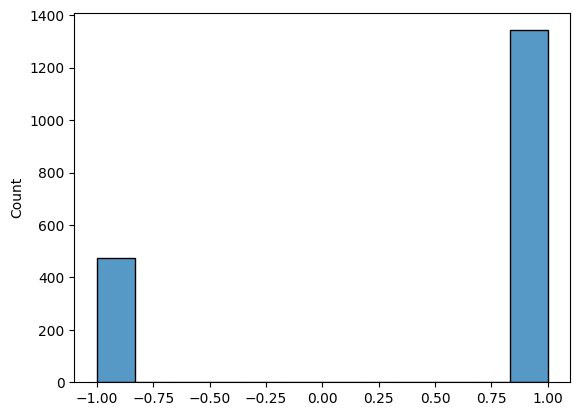

In [195]:
sns.histplot(predict)

In [196]:
from collections import Counter
counts = Counter(predict)

print("Count of 1:", counts[1])
print("Count of -1:", counts[-1])

Count of 1: 1343
Count of -1: 475


### GMM

In [197]:

gmm = GaussianMixture(n_components=2, random_state=5)
gmm.fit(data_clean)
predict = gmm.predict(X_test) #can manually decide threshold from probablity, can try that


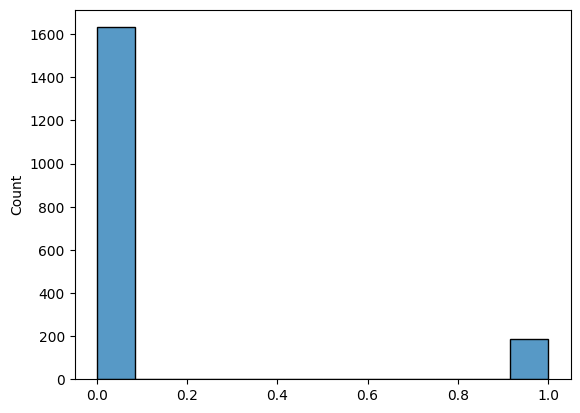

In [198]:
sns.histplot(predict)
counts = Counter(predict)

In [199]:
print("Count of 1:", counts[1])
print("Count of -1:", counts[0])

Count of 1: 186
Count of -1: 1632


### One Class SVM

In [200]:
ocsvm = OneClassSVM(nu=0.025, kernel="rbf", gamma="scale") #learn about nu=0.05. decreasing it decrease anomaly
ocsvm.fit(data_clean)
predict = ocsvm.predict(X_test)

<Axes: ylabel='Count'>

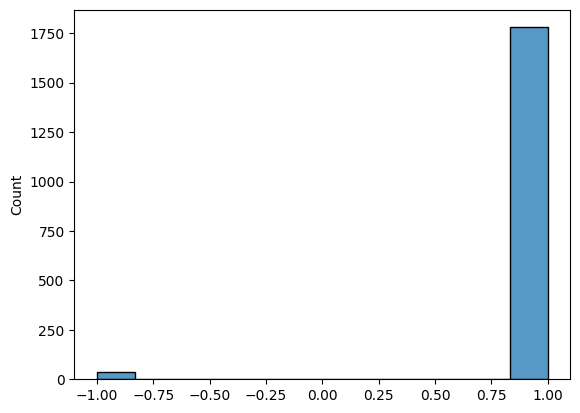

In [201]:
sns.histplot(predict)

In [202]:
counts = Counter(predict)
print("Count of 1 (Normal Points):", counts[1])
print("Count of -1 (Anomalies):", counts[-1])

Count of 1 (Normal Points): 1780
Count of -1 (Anomalies): 38


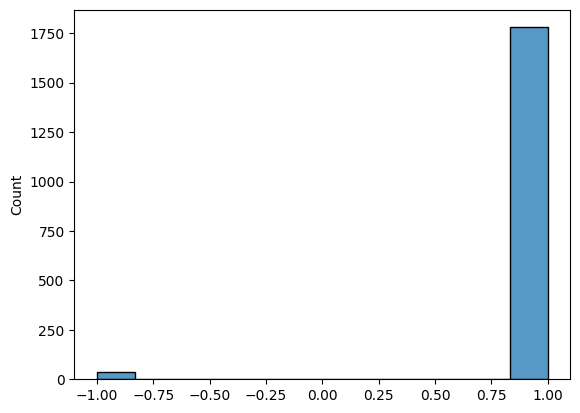

In [203]:
sns.histplot(predict)
counts = Counter(predict)

In [204]:
from sklearn.metrics import confusion_matrix
y_true = [1] * len(predict)
conf_matrix = confusion_matrix(y_true, predict)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[   0    0]
 [  38 1780]]


In [205]:
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()
print(f"Accuracy: {accuracy}")

precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
print(f"Precision: {precision}")

recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
print(f"Recall: {recall}")

f1_score = 2 * (precision * recall) / (precision + recall)
print(f"F1-Score: {f1_score}")


Accuracy: 0.9790979097909791
Precision: 1.0
Recall: 0.9790979097909791
F1-Score: 0.9894385769872152


In [206]:
import pickle

with open('ocvsm.pkl', 'wb') as file:
    pickle.dump(ocsvm, file)

In [207]:
data_clean.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Driving_experience', 'Type_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Vehicle_movement'],
      dtype='object')

In [208]:
X = np.array([[17,1,0,1,0,5,1,6,1,0,0,3,2,2]])
Y = ocsvm.predict(X)

c:\Users\MANN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(


In [209]:
Y

array([1], dtype=int64)

c:\Users\MANN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(


3.214767894905167


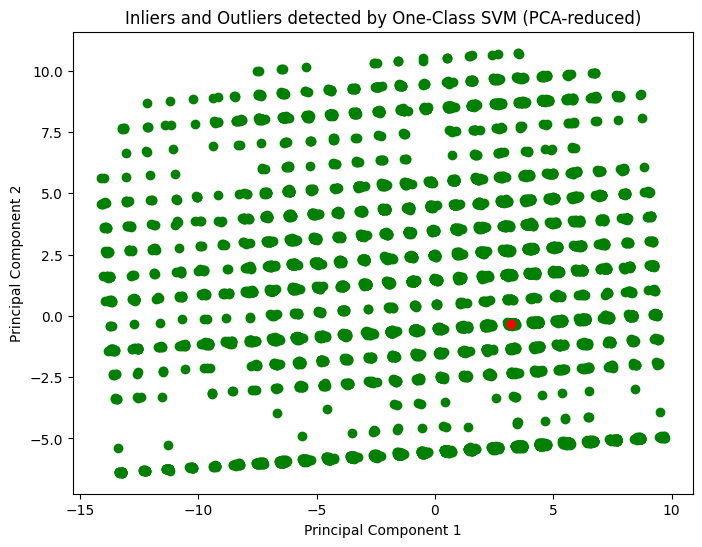

In [210]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Assuming X_test has 14 features and 'predict' contains the output from ocsvm.predict(X_test)
# 1 for inliers and -1 for outliers

# Reduce the dimensionality of X_test to 2D using PCA
pca = PCA(n_components=2)
X_temp = np.vstack([data_clean,X])
X_test_2d = pca.fit_transform(X_temp)

predict = ocsvm.predict(X_temp)

# Split the data into inliers and outliers based on the prediction
inliers = X_test_2d[predict == 1]
outliers = X_test_2d[-1]

print(outliers[0])

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(inliers[:, 0], inliers[:, 1], color='green', label='Inliers')
if (Y == 1):
    plt.scatter(outliers[0], outliers[1], color='blue', label='Inliers only')
else:
    plt.scatter(outliers[0], outliers[1], color='red', label='Outliers')

# # Add labels and legend
plt.title('Inliers and Outliers detected by One-Class SVM (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# # Show the plot
plt.show()
